In [1]:
from torch import empty, tensor
import math
import numpy as np 
import random
from framework import *
import torch 
#torch.set_grad_enabled(False)
#used only in the plots

In [28]:
# define bounds of the domain
min1, max1 = 0, 1.01
min2, max2 = 0, 1.01
# define the x and y scale
x1grid = np.arange(min1, max1, 0.001)
x2grid = np.arange(min2, max2, 0.001)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
grid = tensor(grid).float()

def countour(net):
    # make predictions for the grid
    yhat = np.floor(net.forward(grid).numpy())
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')
    #plot the data
    plt.plot(test_data[:,0][test_target[:,0]==1], test_data[:,1][test_target[:,0]==1],'bo')
    plt.plot(test_data[:,0][test_target[:,0]!=1], test_data[:,1][test_target[:,0]!=1],'go')
    return yhat

def countour_(net):
    # make predictions for the grid
    yhat = net.forward(grid).argmax(1).int().numpy()
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')
    #plot the data
    plt.plot(test_data[:,0][test_target[:,0]==1], test_data[:,1][test_target[:,0]==1],'bo')
    plt.plot(test_data[:,0][test_target[:,0]!=1], test_data[:,1][test_target[:,0]!=1],'go')
    return yhat

In [3]:
def training(train_data, train_target, net, optimizer, epochs, batch_size, permute = True):
    
    #total numbner of data points 
    N=train_data.shape[0]
    
    #initialize the list that stores the log of the losses
    losses_log = []
    
    #train the network
    for e in range(epochs):
        
        #set the loss to zero at the beginning of an epoch 
        acc_loss=0
        
        #if requested we shuffle the dataset before creating the batches
        if permute:
            indices = list(range(len(train_data)))
            random.shuffle(indices)
            train_data_shuffled = train_data[indices]
            train_target_shuffled = train_target[indices]
            
        else:
            train_data_shuffled = train_data
            train_target_shuffled = train_target
        
        #update the gradients for each batch
        for b in range(0, N, batch_size):
            
            #compute the forward pass of both the net and the loss on the batch
            predictions = net.forward(train_data_shuffled[b:b+batch_size])
            l= loss.forward(predictions, train_target_shuffled[b:b+batch_size])
            
            #increment the loss
            acc_loss += l
            
            #set the gradient of the parameters to zero 
            optimizer.zero_grad()
            
            #call the backward pass
            net.backward(loss.backward())
            
            #take an optimizer step
            optimizer.step()
        
        #log the loss on screen and save it in a tensor
        print(e, '   MSE loss = ' , acc_loss.item()) 
        losses_log += [acc_loss.item()]
    
    #return the log of the losses
    return tensor(losses_log)

In [4]:
#counting corrects on test
def test_tanh(net, test_data, test_target, verbose = False):
    correct_count=0
    for i in range(test_data.shape[0]):
            x=test_data[i]
            y=test_target[i]

            y_pred = net.forward(x.unsqueeze(0))

            correct = y_pred.sign()*y>0
            if verbose:
                print('prediction output \t', round(y_pred.item(), 2), '\t\treal output\t', round(y.item(), 2),'\t\tcorrect prediction?', correct.item())
            if correct : correct_count += 1

    print('Correct predictions after '+str(epochs)+' training steps: '+str(correct_count/test_data.shape[0]*100)+' %')

In [5]:
#counting corrects on test
def test_sig(net, test_data, test_target, verbose = False):
    correct_count=0
    for i in range(test_data.shape[0]):
            x=test_data[i]
            y=test_target[i]

            y_pred = net.forward(x.unsqueeze(0))

            correct = y_pred.argmax()==y.argmax()
            if verbose:
                print('prediction output \t', y_pred, y_pred.argmax(), '\t\treal output\t', y, y.argmax(),'\t\tcorrect prediction?', correct)
            if correct : correct_count += 1

    print('Correct predictions after '+str(epochs)+' training steps: '+str(correct_count/test_data.shape[0]*100)+' %')

In [6]:
#function to generate the data
def generate_disc_set(nb):
    input_ = empty(nb, 2).uniform_(0, 1)
    target = (input_-0.5).pow(2).sum(1).sub(1 / (math.pi*2)).sign().add(1).div(2).long()
    target= 1 -target
    target = 2*target -1 
    return input_, target.view(-1, 1)

In [7]:
def convert_to_one_hot_labels(input, target):
    tmp = input.new_zeros(target.size(0), target.max() + 1)
    tmp.scatter_(1, target.view(-1, 1), 1.0)
    return tmp

In [8]:
N_data_point = 1000
train_data, train_target= generate_disc_set(N_data_point)
test_data,  test_target = generate_disc_set(N_data_point)
#lets try not to normalize it: since it is in [0, 1]^2 this is just a traslation and a sqrt(3) resizing in both directions

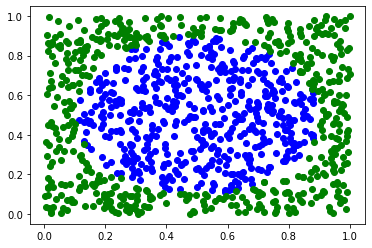

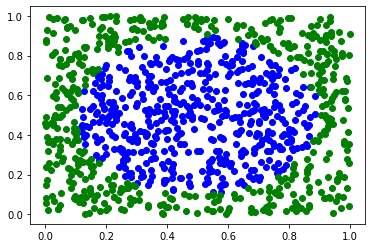

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
plt.plot(train_data[:,0][train_target[:,0]==1], train_data[:,1][train_target[:,0]==1],'bo')
plt.plot(train_data[:,0][train_target[:,0]!=1], train_data[:,1][train_target[:,0]!=1],'go')

fig = plt.figure()
plt.plot(test_data[:,0][test_target[:,0]==1], test_data[:,1][test_target[:,0]==1],'bo')
plt.plot(test_data[:,0][test_target[:,0]!=1], test_data[:,1][test_target[:,0]!=1],'go')

In [10]:
##########################################################################################################################
## Homemade sequential linear + tanh

In [11]:
linear1 = Linear(2, 25, True)
linear2 = Linear(25,25,True)
linear3 = Linear(25,25,True)
linear4 = Linear(25,1,True)
sigma1 = Tanh()
sigma2 = Tanh()
sigma3 = Tanh()
sigma4 = Tanh()

loss = MSE()

net = Sequential([
    linear1, 
    sigma1 ,
    linear2,
    sigma2 ,
    linear3,
    sigma3 ,
    linear4,
    sigma4
])

In [12]:
optimizer = SGD(lr = .1,momentum=True, parameters = net.get_parameters())
epochs=400
batch_size = 100
losses_log = training(train_data, train_target, net, optimizer, epochs, batch_size)

0    MSE loss =  10.107610702514648
1    MSE loss =  10.045387268066406
2    MSE loss =  9.99241828918457
3    MSE loss =  9.991656303405762
4    MSE loss =  9.98952865600586
5    MSE loss =  9.98897647857666
6    MSE loss =  9.986083030700684
7    MSE loss =  9.985055923461914
8    MSE loss =  9.99268913269043
9    MSE loss =  9.982186317443848
10    MSE loss =  9.982267379760742
11    MSE loss =  9.981194496154785
12    MSE loss =  9.980109214782715
13    MSE loss =  9.978785514831543
14    MSE loss =  9.977434158325195
15    MSE loss =  9.976349830627441
16    MSE loss =  9.97767162322998
17    MSE loss =  9.977551460266113
18    MSE loss =  9.97336196899414
19    MSE loss =  9.974935531616211
20    MSE loss =  9.973980903625488
21    MSE loss =  9.97057056427002
22    MSE loss =  9.974735260009766
23    MSE loss =  9.9704008102417
24    MSE loss =  9.973044395446777
25    MSE loss =  9.96711254119873
26    MSE loss =  9.965764999389648
27    MSE loss =  9.966089248657227
28    MSE 

237    MSE loss =  8.816617965698242
238    MSE loss =  8.782720565795898
239    MSE loss =  8.756890296936035
240    MSE loss =  8.724894523620605
241    MSE loss =  8.689193725585938
242    MSE loss =  8.658448219299316
243    MSE loss =  8.63029670715332
244    MSE loss =  8.595268249511719
245    MSE loss =  8.560891151428223
246    MSE loss =  8.521286010742188
247    MSE loss =  8.498550415039062
248    MSE loss =  8.451010704040527
249    MSE loss =  8.414346694946289
250    MSE loss =  8.374465942382812
251    MSE loss =  8.350337028503418
252    MSE loss =  8.302762031555176
253    MSE loss =  8.261592864990234
254    MSE loss =  8.231475830078125
255    MSE loss =  8.187101364135742
256    MSE loss =  8.14807415008545
257    MSE loss =  8.122909545898438
258    MSE loss =  8.076713562011719
259    MSE loss =  8.035700798034668
260    MSE loss =  8.009757041931152
261    MSE loss =  7.9520111083984375
262    MSE loss =  7.922862529754639
263    MSE loss =  7.879343509674072
26

In [13]:
x = empty(10, 10).uniform_()
x.softmax(1).sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

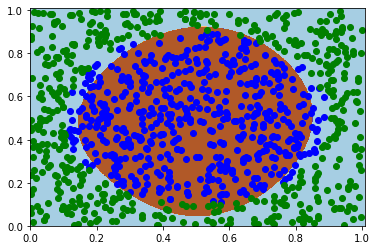

In [14]:
%matplotlib inline
yhat = countour(net)

Correct predictions after 400 training steps: 93.30000000000001 %


Text(0.5, 1.0, 'Full Tanh')

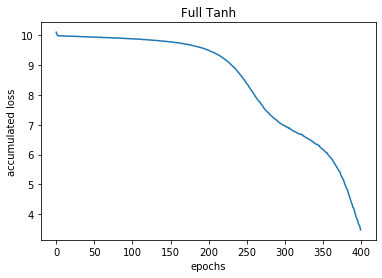

In [15]:
test_tanh(net, test_data, test_target, verbose = False)
plt.plot(tensor(np.arange(losses_log.shape[0])), losses_log)
plt.xlabel('epochs')
plt.ylabel('accumulated loss')
plt.title('Full Tanh')

In [16]:
##########################################################################################################################
## Homemade sequential linear + relu. Tanh at the end

In [33]:
linear1 = Linear(2, 25, True)
linear2 = Linear(25,25,True)
linear3 = Linear(25,25,True)
linear4 = Linear(25,1,True)
sigma1 = ReLu()
sigma2 = ReLu()
sigma3 = ReLu()
sigma4 = Tanh()
loss = MSE()

net = Sequential([
    linear1, 
    sigma1 ,
    linear2,
    sigma2 ,
    linear3,
    sigma3 ,
    linear4,
    sigma4
])

In [34]:
optimizer = SGD(lr = 0.1 ,momentum=True, parameters = net.get_parameters())
epochs=400
batch_size = 100
losses_log = training(train_data, train_target, net, optimizer, epochs, batch_size)

0    MSE loss =  9.995914459228516
1    MSE loss =  9.990558624267578
2    MSE loss =  9.983661651611328
3    MSE loss =  9.977965354919434
4    MSE loss =  9.971623420715332
5    MSE loss =  9.964202880859375
6    MSE loss =  9.956876754760742
7    MSE loss =  9.949506759643555
8    MSE loss =  9.941006660461426
9    MSE loss =  9.934027671813965
10    MSE loss =  9.929405212402344
11    MSE loss =  9.925171852111816
12    MSE loss =  9.918304443359375
13    MSE loss =  9.912908554077148
14    MSE loss =  9.910483360290527
15    MSE loss =  9.903453826904297
16    MSE loss =  9.899381637573242
17    MSE loss =  9.89423942565918
18    MSE loss =  9.89256763458252
19    MSE loss =  9.885013580322266
20    MSE loss =  9.880867004394531
21    MSE loss =  9.877248764038086
22    MSE loss =  9.872610092163086
23    MSE loss =  9.868736267089844
24    MSE loss =  9.86618423461914
25    MSE loss =  9.862702369689941
26    MSE loss =  9.857330322265625
27    MSE loss =  9.85324764251709
28    

234    MSE loss =  2.131675958633423
235    MSE loss =  2.0936784744262695
236    MSE loss =  2.088062047958374
237    MSE loss =  2.0578598976135254
238    MSE loss =  2.033501386642456
239    MSE loss =  2.0052411556243896
240    MSE loss =  1.9881268739700317
241    MSE loss =  1.9680243730545044
242    MSE loss =  1.9389653205871582
243    MSE loss =  1.9205920696258545
244    MSE loss =  1.9183423519134521
245    MSE loss =  1.931131362915039
246    MSE loss =  1.8821532726287842
247    MSE loss =  1.8497624397277832
248    MSE loss =  1.8441131114959717
249    MSE loss =  1.8232996463775635
250    MSE loss =  1.812531590461731
251    MSE loss =  1.7828304767608643
252    MSE loss =  1.767449975013733
253    MSE loss =  1.748899221420288
254    MSE loss =  1.7533555030822754
255    MSE loss =  1.718335747718811
256    MSE loss =  1.7104839086532593
257    MSE loss =  1.7039275169372559
258    MSE loss =  1.666653037071228
259    MSE loss =  1.6546465158462524
260    MSE loss =  1.

Correct predictions after 400 training steps: 97.8 %


Text(0.5, 1.0, 'ReLu + Tanh at the end')

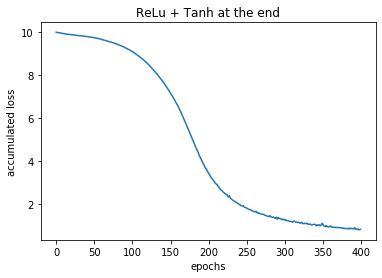

In [35]:
test_tanh(net, test_data, test_target, verbose = False)
plt.plot(tensor(np.arange(losses_log.shape[0])), losses_log)
plt.xlabel('epochs')
plt.ylabel('accumulated loss')
plt.title('ReLu + Tanh at the end')

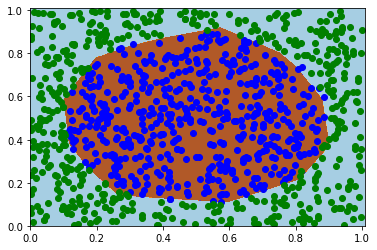

In [20]:
yhat = countour(net)

In [21]:
##########################################################################################################################
## Homemade sequential linear + Relu. Softmax at the end

In [22]:
#handmade sequential linear + relu with softmax with batches
linear1 = Linear(2, 25, True)
linear2 = Linear(25,25,True)
linear3 = Linear(25,25,True)
linear4 = Linear(25,2,True)
sigma1 = ReLu()
sigma2 = ReLu()
sigma3 = ReLu()
sigma4 = Softmax()
loss = MSE()

net = Sequential([
    linear1, 
    sigma1 ,
    linear2,
    sigma2 ,
    linear3,
    sigma3 ,
    linear4,
    sigma4
])


In [23]:
train_target_hot = (train_target + 1).div(2.).long()
test_target_hot = (test_target + 1).div(2.).long()
train_target_hot = convert_to_one_hot_labels( train_data, train_target_hot)
test_target_hot = convert_to_one_hot_labels( test_target, test_target_hot)

In [24]:
optimizer = SGD(lr = 100.,momentum=False, parameters = net.get_parameters())
epochs=400
batch_size = 100
losses_log = training(train_data, train_target_hot, net, optimizer, epochs, batch_size)

0    MSE loss =  2.5074501037597656
1    MSE loss =  2.487031936645508
2    MSE loss =  2.4837799072265625
3    MSE loss =  2.4724810123443604
4    MSE loss =  2.458566665649414
5    MSE loss =  2.4572105407714844
6    MSE loss =  2.452481269836426
7    MSE loss =  2.381037950515747
8    MSE loss =  2.33897066116333
9    MSE loss =  2.276197910308838
10    MSE loss =  2.285750150680542
11    MSE loss =  2.047914505004883
12    MSE loss =  2.240626811981201
13    MSE loss =  2.140380859375
14    MSE loss =  1.917814016342163
15    MSE loss =  1.9279087781906128
16    MSE loss =  1.7696070671081543
17    MSE loss =  1.7628812789916992
18    MSE loss =  1.836329460144043
19    MSE loss =  1.5786081552505493
20    MSE loss =  1.6216124296188354
21    MSE loss =  1.3136625289916992
22    MSE loss =  1.611920714378357
23    MSE loss =  1.3151720762252808
24    MSE loss =  1.2879955768585205
25    MSE loss =  1.5413743257522583
26    MSE loss =  1.173324704170227
27    MSE loss =  1.116701364

223    MSE loss =  0.34073999524116516
224    MSE loss =  0.3576239347457886
225    MSE loss =  0.3091282248497009
226    MSE loss =  0.22865767776966095
227    MSE loss =  0.22696757316589355
228    MSE loss =  0.29097849130630493
229    MSE loss =  0.16657817363739014
230    MSE loss =  0.24570304155349731
231    MSE loss =  0.47192734479904175
232    MSE loss =  0.37748175859451294
233    MSE loss =  0.18453697860240936
234    MSE loss =  0.374127596616745
235    MSE loss =  0.2681475281715393
236    MSE loss =  0.23974107205867767
237    MSE loss =  0.19510401785373688
238    MSE loss =  0.3274569511413574
239    MSE loss =  0.275626003742218
240    MSE loss =  0.17254775762557983
241    MSE loss =  0.2582872211933136
242    MSE loss =  0.186825692653656
243    MSE loss =  0.2684018313884735
244    MSE loss =  0.3085595369338989
245    MSE loss =  0.5275602340698242
246    MSE loss =  0.19022780656814575
247    MSE loss =  0.21230733394622803
248    MSE loss =  0.3601939380168915
2

Correct predictions after 400 training steps: 98.3 %


Text(0.5, 1.0, 'ReLu + Softmax at the end')

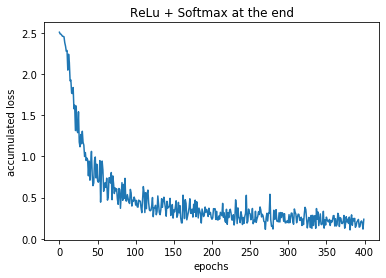

In [25]:
test_sig(net, test_data, test_target_hot, verbose = False)
plt.plot(tensor(np.arange(losses_log.shape[0])), losses_log)
plt.xlabel('epochs')
plt.ylabel('accumulated loss')
plt.title('ReLu + Softmax at the end')

array([0, 0, 0, ..., 0, 0, 0])

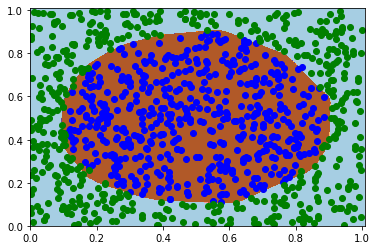

In [29]:
countour_(net)